# Project 2: Wrangling and Analyzing Data From We Rate Dogs Twitter Page

## Data Gathering
Gathering **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and read into a dataframe

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)
import requests
import tweepy
import json
from timeit import default_timer as timer

In [126]:
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [16]:
# Reading the twitter-archive-enhanced into a DataFrame and inspecting
twitter_archive = pd.read_csv(r'twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv) and read it into a dataframe

In [17]:
# Download the image_predictions.tsv file programmatically
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = 'image_prediction.tsv'
# Write content of url into a file
with open(file_name, mode='wb') as file:
    file.write(response.content)

In [18]:
# Read the contents of the tsv file
image_prediction = pd.read_csv(r'image_prediction.tsv', sep='\t')
image_prediction.shape

(2075, 12)

In [9]:
# Checking to see if tweet_ids in both data frame match and getting tweet_id values
twitter_archive['tweet_id'].isin(image_prediction['tweet_id']).sum()
tweet_ids = twitter_archive['tweet_id'].values
len(tweet_ids)

2356

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) and rfead it into a DataFrame

In [12]:
# Use the Tweepy library to query additional data via the Twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [13]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [23]:
# Read json file into a pandas DataFrame
pulled_tweet = pd.read_json('tweet_json.txt', lines=True, encoding ='utf-8')
pulled_tweet.head()
#pulled_tweet.tail(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5302,29345,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3483,22069,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7229,36957,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7768,35329,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,2602,17820,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [24]:
# Make a copy of the pulled_tweet dataframe
pulled_tweet_copy = pulled_tweet.copy()

In [25]:
# Extracting columns needed for analysis only
pulled_tweets = pulled_tweet_copy[['id', 'retweet_count', 'favorite_count']]
pulled_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


## Assessing Data
Detecting and documenting at least **eight (8) quality issues and two (2) tidiness issue**. Using **both** visual assessment
programmatic assessement to assess the data.

**Note:** To pay attention to the following key points when accessing the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [26]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [27]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
pulled_tweets.head()

,id,retweet_count,favorite_count
0,892177421306343426,5302,29345
1,891815181378084864,3483,22069
2,891689557279858688,7229,36957
3,891327558926688256,7768,35329
4,891087950875897856,2602,17820


### Programmatic Assessment

In [29]:
# Viewing the general info of the dataframe. Some null values, will be dealt with at the cleaning stage
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [30]:
# Viewing the general info of the dataframe, No null values.
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
# Viewing the general info of the dataframe, NO null values.
pulled_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [32]:
# Checking for duplicate column names in the three datasets. Only one - tweet_id(great!)
all_columns = pd.Series(list(twitter_archive) + list(image_prediction) + list(pulled_tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [33]:
# Lets see summary statistics for the twitter_archive dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [34]:
# Investigate ratings with high rating denominator values
twitter_archive[twitter_archive['rating_denominator'] > 10]['text']

342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1662    This is Darrel. He just robbed a 7/11 and is i...
1663    I'm aw

In [35]:
# Investigate ratings with high rating numerator values
twitter_archive[twitter_archive['rating_numerator'] > 20]['text']

188     @dhmontgomery We also gave snoop dogg a 420/10...
189     @s8n You tried very hard to portray this good ...
290                                    @markhoppus 182/10
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
340     RT @dog_rates: This is Logan, the Chow who liv...
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
902     Why does this never happen at my front door......
979     This is Atticus. He's quite simply America af....
1120    Say hello to this unbelievably well behaved sq...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy 

In [36]:
# Checking for the upper and lower  values of the rating_numerator
twitter_archive['rating_numerator'].quantile([0.1,0.989])

0.100     8.00
0.989    15.19
Name: rating_numerator, dtype: float64

In [37]:
# Checking twitter_archive dataframe for tweets that actually retweets
twitter_archive[~twitter_archive['retweeted_status_id'].isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [38]:
# Checking for unique names of dogs in the twitter_archive dataframe
some_names = twitter_archive.name.value_counts()
some_names

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [39]:
# Some dogs seem to have names like a, an, such and the. Lets investigate this.
twitter_archive.query('name in ["a", "an", "the", "such", "none"]').name.value_counts()

a       55
the      8
an       7
such     1
Name: name, dtype: int64

In [40]:
# Lets check out the tweet
twitter_archive.query('name in ["a", "an", "the", "such", "none"]').text

22      I've yet to rate a Venezuelan Hover Wiener. Th...
56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
759     RT @dog_rates: This is an East African Chalupa...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1362    This is an East African Chalupa Seal. We only ...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Puppe

In [41]:
# Lets check the number of rows with invalid names
len(twitter_archive.query('name in ["a", "an", "the", "such"]'))

71

In [42]:
# Lets see summary statistics for the image_prediction dataframe. Everything seems good.
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [43]:
# Lets see the summary statistics for the pulled_tweets dataframe. 
# seems ok as some tweets tend to have a very high number of likes and retweets
# Will only be removed if they tend to affect analysis.
pulled_tweets.describe()

,id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.417449e+17,2471.618925,7049.467527
std,6.816092e+16,4188.261241,10958.717702
min,6.660209e+17,1.000000,0.000000
25%,6.780233e+17,495.000000,1223.000000
50%,7.178418e+17,1149.000000,3053.000000
75%,7.986440e+17,2863.000000,8603.000000
max,8.921774e+17,70795.000000,144985.000000


In [44]:
# Checking for duplicates
twitter_archive.duplicated().sum()

0

In [45]:
# Checking for duplicates
image_prediction.duplicated().sum()

0

In [46]:
# Checking for duplicates
pulled_tweets.duplicated().sum()

0

### Quality issues
1. Remove retweets from the twitter_archive dataframe leaving original tweets.

2. Data type of timestamp is object instead of datatime in the twitter_archive dataframe

3. Drop the columns that are related to retweet status i.e (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) since they are null for origianl tweets. 

4. In the twitter_archive dataframe, drop columns with too many null values i.e (in_reply_to_status_id, in_reply_to_user_id)

5. In the twitter_archive dataframe, rating_denominator column has a very large outlier values that deviates from the standard value which is 10.

6. In the twitter_archive dataframe, rating_denominator column has a huge outlier values and decimal values that were not extracted properly. Also change the datatype from int to float.

7. In the twitter_archive dataframe, there seems to dogs with invalid names like 'a', 'the', 'an', 'such' and others in lower case.

8. Remame the 'id' column in the pulled_tweets dataframe to 'tweet_id'.

9. Drop rows with null values in expanded url column

### Tidiness issues
1. The doggo puppo, floofer and pupper columns in the twitter_archive dataframe should be merged into a column named dog_class.

2. The rating demoninator column should be dropped since all rows have the same value which is 10.

3. The cleaned version of the three datasets should be merged together.

##### Seems like most of the data issues have been captured, lets go ahead to the cleaning stage

## Cleaning Data

##### Before cleaning lets make copy of each dataframe to preserve the original datasets. After this has been done, we can go ahead to do clean them.

In [461]:
# Copy of twitter_archive dataframe
archive_copy = twitter_archive.copy()
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [462]:
# copy of image_prediction dataframe
prediction_copy = image_prediction.copy()
prediction_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [463]:
# copy of pulled_tweets dataframe
count_copy = pulled_tweets.copy()
count_copy.head()

,id,retweet_count,favorite_count
0,892177421306343426,5302,29345
1,891815181378084864,3483,22069
2,891689557279858688,7229,36957
3,891327558926688256,7768,35329
4,891087950875897856,2602,17820


### Quality Issues

#### Issue #1: 
Remove retweets from the twitter_archive dataframe leaving original tweets that have images

#### Define: 
Drop rows that contain retweets using .drop() method

#### Code

In [464]:
archive_copy.drop(index=archive_copy[~archive_copy['retweeted_status_id'].isnull()].index, inplace=True)

#### Test

In [465]:
archive_copy[~archive_copy['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue #2:
Data type of timestamp is object instead of datatime in the twitter_archive dataframe

#### Define: 
Change the datatype from object to datetime

#### Code

In [466]:
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

#### Test

In [467]:
archive_copy.timestamp.dtype

datetime64[ns, UTC]

#### Issue #3:
Drop the columns that are related to retweet status i.e (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) since they are all null for origianl tweets.

#### Define:
Drop columns that are related to retweets

#### Code

In [468]:
archive_copy.drop(columns = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], inplace=True)

#### Test

In [469]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

#### Issue #4:
In the twitter_archive dataframe, drop columns with too many null values i.e (in_reply_to_status_id, in_reply_to_user_id)

#### Define:
Drop columns with too much null values

#### Code

In [470]:
archive_copy.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

#### Test

In [471]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Issue #5:
In the twitter_archive dataframe, rating_denominator column has a very large outlier values that deviates from the standard value which is 10.

#### Define:
Set rating_denominator values that are greater than 10 to be equal to 10.

#### Code

In [472]:
mask_true = archive_copy['rating_denominator'] != 10
true = archive_copy[mask_true].index
for i in true:
    archive_copy.loc[i, 'rating_denominator'] = int(10)

#### Test

In [473]:
archive_copy[archive_copy['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue #6:
In the twitter_archive dataframe, rating_numerator column has a huge outlier values and decimal values that were not extracted properly. Also change the datatype from int to float.

#### Define:
Drop values rows that have values of rating_numerator greater than 15, extract decimal rating values and change datatype of the column to float.

#### Code

In [474]:
archive_copy['rating_numerator'] = archive_copy.rating_numerator.astype('float')
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [475]:
mask_decimal = archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")

In [476]:
archive_copy[mask_decimal][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [477]:
for i in archive_copy[mask_decimal].index:
    archive_copy.loc[i, 'rating_numerator'] = float(archive_copy[mask_decimal].text.str.extract(r"(\d+\.\d*)")[0][i])
    

In [478]:
archive_copy[mask_decimal][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


In [479]:
mask_outliers = archive_copy['rating_numerator'] > 15
archive_copy.drop(index = archive_copy[mask_outliers].index, inplace = True)

#### Test

In [480]:
archive_copy[mask_outliers]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [481]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2153 non-null   int64              
 1   timestamp           2153 non-null   datetime64[ns, UTC]
 2   source              2153 non-null   object             
 3   text                2153 non-null   object             
 4   expanded_urls       2101 non-null   object             
 5   rating_numerator    2153 non-null   float64            
 6   rating_denominator  2153 non-null   int64              
 7   name                2153 non-null   object             
 8   doggo               2153 non-null   object             
 9   floofer             2153 non-null   object             
 10  pupper              2153 non-null   object             
 11  puppo               2153 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

#### Issue #7:
In the twitter_archive dataframe, there seems to dogs with invalid names like ('a', 'the', 'an' and 'such') and others in lower case.

#### Define:
Set names of dogs with invalid names to none.

#### Code

In [482]:
for i in archive_copy[archive_copy['name'] == archive_copy['name'].str.lower()].index:
    archive_copy.loc[i, 'name'] = 'None'

#### Test

In [483]:
archive_copy[archive_copy['name'] == archive_copy['name'].str.lower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue #8:
Remame the 'id' column in the pulled_tweets dataframe to 'tweet_id'.

#### Define:
Use the rename method to change 'id' to 'tweet_id'

#### Code

In [484]:
count_copy = count_copy.rename(columns = {'id':'tweet_id'})

#### Test

In [485]:
count_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


#### Issue #9:
The expanded url column in archive_copy dataframe contains null values

#### Define:
Drop null values in the column

#### Code

In [490]:
archive_copy.dropna(inplace=True)

#### Test

In [491]:
archive_copy.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Tidiness Issues

#### Issue #1:
The doggo puppo, floofer and pupper columns in the twitter_archive dataframe should be merged into a column named dog_class.

#### Define:
Combine  doggo puppo, floofer and pupper into one column.

#### Code

In [492]:
archive_copy['dog_class'] = archive_copy[['puppo', 'pupper', 'floofer', 'doggo']].apply(lambda x: ','.join(x.astype(str)),axis=1)
archive_copy['dog_class'] = archive_copy['dog_class'].str.replace(r'(None,)', repl='')
archive_copy['dog_class'] = archive_copy['dog_class'].str.replace(r'(,None)', repl='')
archive_copy.drop(columns = ['puppo','pupper','floofer','doggo'], inplace=True)

#### Test

In [493]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2101 non-null   int64              
 1   timestamp           2101 non-null   datetime64[ns, UTC]
 2   source              2101 non-null   object             
 3   text                2101 non-null   object             
 4   expanded_urls       2101 non-null   object             
 5   rating_numerator    2101 non-null   float64            
 6   rating_denominator  2101 non-null   int64              
 7   name                2101 non-null   object             
 8   dog_class           2101 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 164.1+ KB


In [494]:
archive_copy.dog_class.value_counts()

None             1763
pupper            222
doggo              72
puppo              23
pupper,doggo       10
floofer             9
puppo,doggo         1
floofer,doggo       1
Name: dog_class, dtype: int64

#### Issue #2:
The rating demoninator column should be dropped since all rows have the same value which is 10

#### Define:
Drop rating_denominator column

#### Code

In [495]:
archive_copy.drop(columns = 'rating_denominator', inplace = True)

#### Test

In [496]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2101 non-null   int64              
 1   timestamp         2101 non-null   datetime64[ns, UTC]
 2   source            2101 non-null   object             
 3   text              2101 non-null   object             
 4   expanded_urls     2101 non-null   object             
 5   rating_numerator  2101 non-null   float64            
 6   name              2101 non-null   object             
 7   dog_class         2101 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 147.7+ KB


#### Issue #3: 
The cleaned version of the three datasets should be merged together.

#### Define:
Use .merge() method to combine the three datasets together

#### Code

In [497]:
twitter_archive_master = archive_copy.merge(count_copy, on='tweet_id', how ='inner').merge(prediction_copy, on='tweet_id', how = 'inner')

#### Test

In [498]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1969 non-null   int64              
 1   timestamp         1969 non-null   datetime64[ns, UTC]
 2   source            1969 non-null   object             
 3   text              1969 non-null   object             
 4   expanded_urls     1969 non-null   object             
 5   rating_numerator  1969 non-null   float64            
 6   name              1969 non-null   object             
 7   dog_class         1969 non-null   object             
 8   retweet_count     1969 non-null   int64              
 9   favorite_count    1969 non-null   int64              
 10  jpg_url           1969 non-null   object             
 11  img_num           1969 non-null   int64              
 12  p1                1969 non-null   object             
 13  p1_

In [499]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_class,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,5302,29345,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,3483,22069,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,7229,36957,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,7768,35329,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,None,None,2602,17820,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [500]:
twitter_archive_master.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
Analyzing and visualizing the wrangled data with least **three (3) insights and one (1) visualization.**

##### Lets create a function that will help to plot histograms to visualize some of these values

In [501]:
def display(column, title):
    # using seaborn's default style to visualize
    sns.set()
    # using seaborn's distplot to visualize the count of column values
    sns.distplot(column, kde=False)
    # set title
    plt.title(title)
    # set y label
    plt.ylabel('Count')
    # show plot
    plt.show()

In [502]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.969000e+03,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1.969000e+03,1.969000e+03
mean,7.356635e+17,10.535693,2248.206704,7725.351955,1.204165,0.593594,1.348524e-01,6.031235e-02
std,6.747456e+16,2.197268,4034.232642,11403.005605,0.563059,0.271872,1.006881e-01,5.084506e-02
min,6.660209e+17,0.000000,11.000000,66.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757404e+17,10.000000,493.000000,1630.000000,1.000000,0.360465,5.421470e-02,1.619070e-02
50%,7.081309e+17,11.000000,1078.000000,3473.000000,1.000000,0.587372,1.186470e-01,4.952370e-02
75%,7.877176e+17,12.000000,2569.000000,9570.000000,1.000000,0.843911,1.955580e-01,9.193000e-02
max,8.921774e+17,14.000000,70795.000000,144985.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


From the summary shown above there seems to be huge outliers that will affect visualization of our plot, thus we will be subsetting for values in our interquartile range.

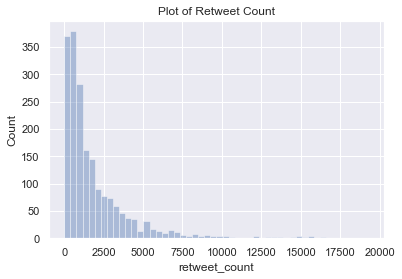

In [503]:
# Visualizations for retweet_count
display(column=twitter_archive_master[twitter_archive_master['retweet_count'] < 20000]['retweet_count'], title='Plot of Retweet Count')

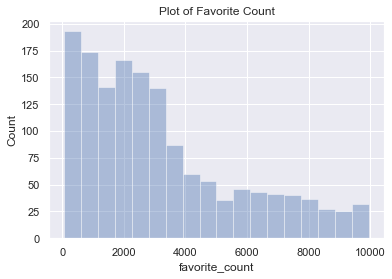

In [504]:
# Visualizations for favorite_count
display(twitter_archive_master[twitter_archive_master['favorite_count'] < 10000]['favorite_count'], 'Plot of Favorite Count')

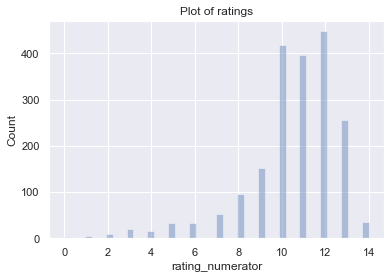

In [505]:
# Visualizations for dog Ratings, recall they are all over 10 i.e 10/10
display(twitter_archive_master['rating_numerator'], 'Plot of ratings')

##### Lets see plots based on the categories of dogs found on the We Rate Dogs Twitter Page.

In [506]:
twitter_archive_master.p1.value_counts().head(10)

golden_retriever      136
Labrador_retriever     89
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                39
Pomeranian             38
toy_poodle             37
malamute               29
Name: p1, dtype: int64

In [507]:
# Subsetting the twitter_archive__master dataframe for image prediction of dogs greater than 0.7 in p1 column
dogs = twitter_archive_master[twitter_archive_master['p1_conf'] > 0.7]

In [508]:
# Checking to see the value counts of dogs correctly predicted
dogs.p1.value_counts().head(20)

golden_retriever            84
Pembroke                    51
Labrador_retriever          44
pug                         35
Chihuahua                   33
Pomeranian                  23
Samoyed                     23
French_bulldog              19
chow                        19
toy_poodle                  15
German_shepherd             12
web_site                    11
seat_belt                   11
malamute                    10
cocker_spaniel              10
Maltese_dog                  9
Shetland_sheepdog            8
Great_Pyrenees               8
Chesapeake_Bay_retriever     8
Brittany_spaniel             7
Name: p1, dtype: int64

In [509]:
# Lets create our own summary statistics for most retweeted, favourite and rated dog!
grouped_dog = dogs.groupby('p1')[['retweet_count', 'favorite_count', 'rating_numerator']].agg({'retweet_count':'sum', 'favorite_count':'sum', 'rating_numerator':'mean'})

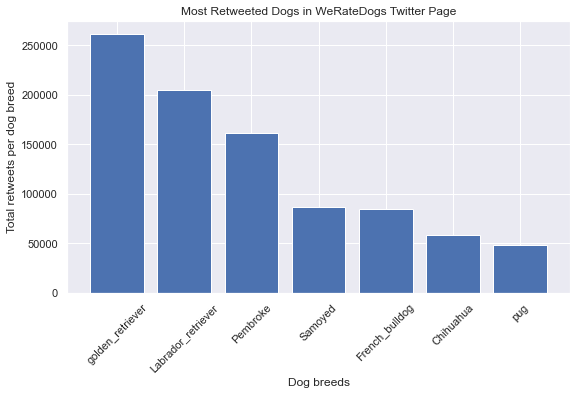

In [514]:
# Lets visualize the top 7 retweeted dogs
retweeted = grouped_dog.sort_values(by='retweet_count', ascending = False)
fig, ax = plt.subplots(figsize = (9, 5))
ax.bar(retweeted.index[:7], retweeted['retweet_count'][:7])
plt.xlabel('Dog breeds')
plt.ylabel('Total retweets per dog breed')
plt.title('Most Retweeted Dogs in WeRateDogs Twitter Page')
ax.tick_params(axis='x',rotation= 45) 

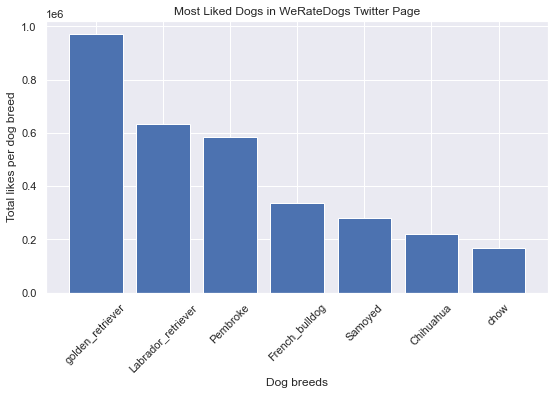

In [515]:
# Lets visualize the top 7 favorite dogs
favorite = grouped_dog.sort_values(by='favorite_count', ascending = False)
fig, ax = plt.subplots(figsize = (9, 5))
ax.bar(favorite.index[:7], favorite['favorite_count'][:7])
plt.xlabel('Dog breeds')
plt.ylabel('Total likes per dog breed')
plt.title('Most Liked Dogs in WeRateDogs Twitter Page')
ax.tick_params(axis='x',rotation= 45) 

### Insights:
1. The most liked posts in WeRateDogs page has images of golden retrievers, Labrador retriever, Pembroke, Samoyed, French Bulldogs, 
Chihuahua, chows and others in this order.

2. The most retweeted posts in WeRateDogs page has images of golden retrievers, Labrador retriever, Pembroke, French Bulldogs, Samoyed,
Chihuahua, pugs and others in this order.

3. On the weratedogs twitter page, there are images of that have very high number of retweet_counts and favorite_counts